# PRJNA1141947 - Kellingray et al.

Article link: [https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9927792/](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9927792/).

In [1]:
suppressPackageStartupMessages({
    library(provoc)
    library(here)
    library(ggplot2)
    library(lubridate)
})

prj <- "PRJNA1141947"
lineages_in_paper <- c("B.1.1.7", "AY.4", "AY.4.2", "B.1.617.2", "BA.1", "B.1.1.529")


In [2]:
coco <- read.csv(
  here(
    "data/processed/",
    paste0(prj, "_processed.csv.gz")
  )
)
coco$mutation <- parse_mutations(coco$label)
head(coco)


,position,label,mutation,frequency,coverage,count,sra,date,sample_name,avg_spot_len,bases,bioproject,location
,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
1,11074,+11075.T,ins:11075:1,0.000000000,138,0,SRR30037525,2022-02-07,72-S1,293,2301551,PRJNA1141947,Norfolk
2,20445,+20446.A,ins:20446:1,0.000000000,69,0,SRR30037525,2022-02-07,72-S1,293,2301551,PRJNA1141947,Norfolk
3,22204,+22205.GAGCCAGAA,ins:22205:9,0.000000000,2,0,SRR30037525,2022-02-07,72-S1,293,2301551,PRJNA1141947,Norfolk
4,28463,+28464.T,ins:28464:1,0.000000000,293,0,SRR30037525,2022-02-07,72-S1,293,2301551,PRJNA1141947,Norfolk
5,29051,+29052.A,ins:29052:1,0.100000000,50,5,SRR30037525,2022-02-07,72-S1,293,2301551,PRJNA1141947,Norfolk
6,11074,-11075.1,del:11075:1,0.007246377,138,1,SRR30037525,2022-02-07,72-S1,293,2301551,PRJNA1141947,Norfolk


In [3]:
barcodes <- provoc::usher_barcodes()
available_lineages <- intersect(lineages_in_paper, rownames(barcodes))
barcodes <- filter_lineages(barcodes, available_lineages)
dim(barcodes)


[1]   6 100

In [4]:
system.time(
    res <- provoc(count / coverage ~ .,
        data = coco,
        lineage_defs = barcodes,
        by = "sra")
)
head(res)


   user  system elapsed 
  1.497   0.036   1.634 

,rho,ci_low,ci_high,lineage,sra,date,sample_name,avg_spot_len,bases,bioproject,location
,<dbl>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
1,8.625337e-01,NA,NA,BA.1,SRR30037525,2022-02-07,72-S1,293,2301551,PRJNA1141947,Norfolk
2,2.920382e-02,NA,NA,B.1.1.529,SRR30037525,2022-02-07,72-S1,293,2301551,PRJNA1141947,Norfolk
3,4.640649e-09,NA,NA,AY.4.2,SRR30037525,2022-02-07,72-S1,293,2301551,PRJNA1141947,Norfolk
4,4.155179e-03,NA,NA,AY.4,SRR30037525,2022-02-07,72-S1,293,2301551,PRJNA1141947,Norfolk
5,2.343775e-03,NA,NA,B.1.1.7,SRR30037525,2022-02-07,72-S1,293,2301551,PRJNA1141947,Norfolk
6,1.690647e-09,NA,NA,B.1.617.2,SRR30037525,2022-02-07,72-S1,293,2301551,PRJNA1141947,Norfolk


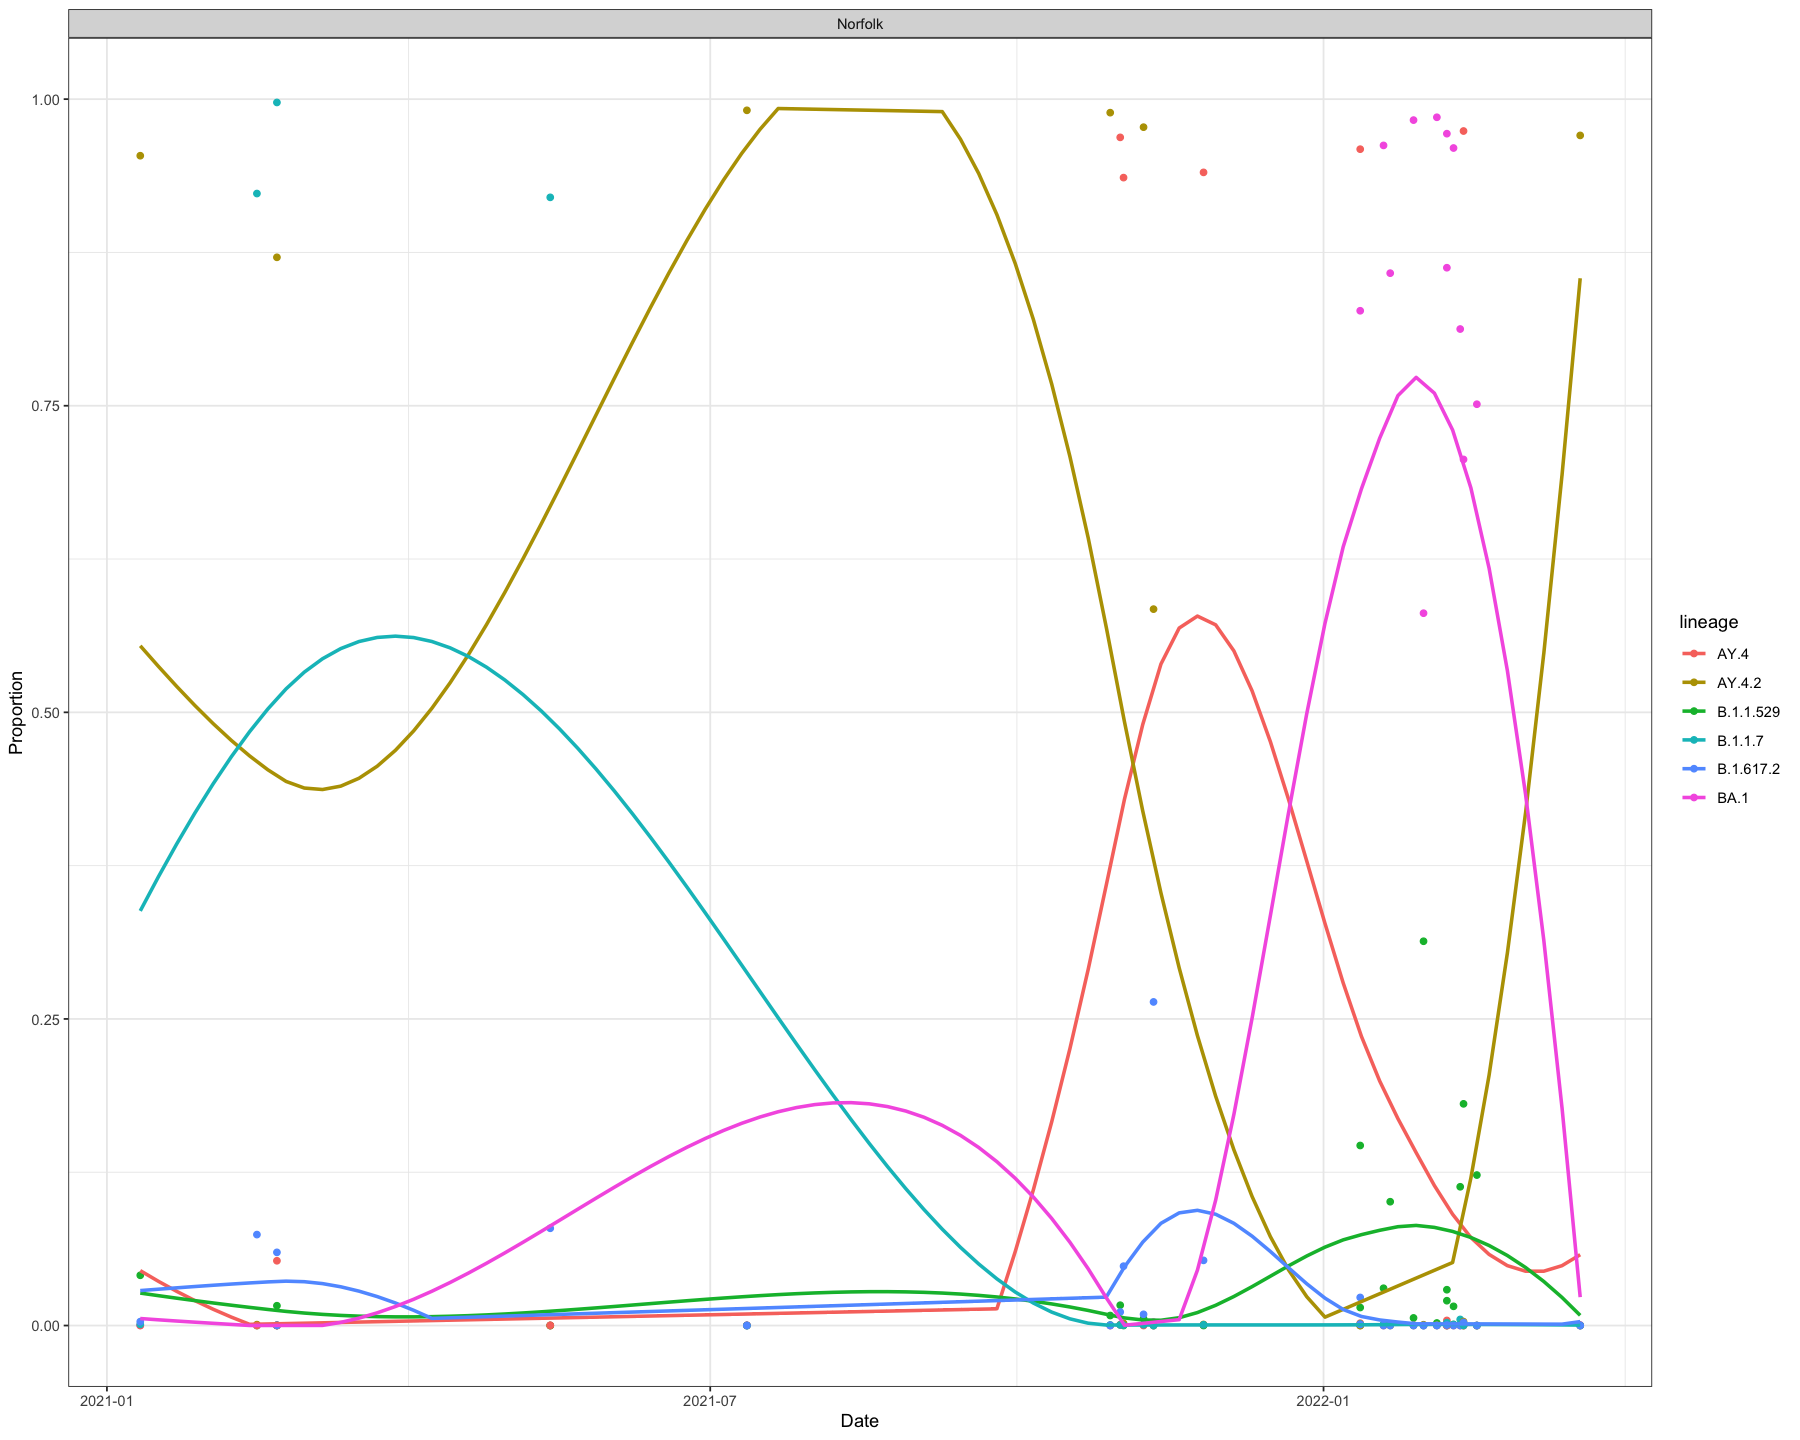

In [5]:
options(repr.plot.width = 15, repr.plot.height = 12)

res$date <- lubridate::ymd(res$date)

gg <- autoplot(res, date_col = "date") + facet_wrap(~location) +
    geom_smooth(formula = y ~ x, se = FALSE, method = "loess") +
    theme_bw()
suppressWarnings(print(gg))
